# 딥러닝1 : 회귀

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프

### (2) 데이터로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 준비

lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅시다.

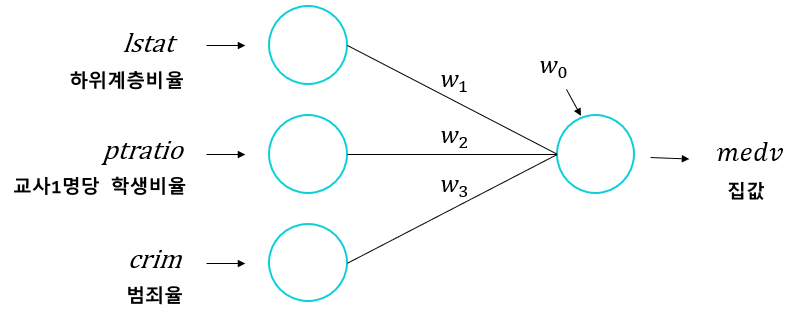

### (1) 데이터 준비
* x, y 나누기
    * x : lstat, ptratio, crim
    * y : medv

In [3]:
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) NaN 조치

### (3) 가변수화

### (4) 데이터분할

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (5) Scaling

In [7]:
# 스케일러 선언
scaler = MinMaxScaler()

# train 셋으로 fitting & 적용
x_train = scaler.fit_transform(x_train)

# validation 셋은 적용만!
x_val = scaler.transform(x_val)

## 3.딥러닝1 : 3개의 feature

### (1) 모델설계

In [8]:
# 분석단위의 shape
nfeatures = x_train.shape[1] #num of columns
nfeatures

3

In [9]:
# 메모리 정리
clear_session()

# Sequential 타입
model = Sequential(Dense(1, input_shape=(nfeatures,)))

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile
    * optimizer = 'adam'    : 기본값으로 옵티마이저 사용(learning_rate = 0.001)
    * optimizer = Adam(lr = 0.1) : 옵션 값 조정 가능
        * lr과 learning_rate은 같지만, learning_rate 사용을 권장

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.1), loss='mse')

### (2) 학습

validation_split=0.2 : 학습시, 학습용 데이터에서 0.2 만큼 떼어 내서 검증셋으로 활용

In [ ]:
history = model.fit(x_train,  y_train, epochs = 20, validation_split=0.2).history # 20번 반복학습

Epoch 1/20
11/11 [==============================] - 1s 17ms/step - loss: 433.4884 - val_loss: 443.9253
Epoch 2/20
11/11 [==============================] - 0s 4ms/step - loss: 367.0178 - val_loss: 382.4540
Epoch 3/20
11/11 [==============================] - 0s 4ms/step - loss: 312.2743 - val_loss: 332.0618
Epoch 4/20
11/11 [==============================] - 0s 7ms/step - loss: 268.6516 - val_loss: 292.4593
Epoch 5/20
11/11 [==============================] - 0s 5ms/step - loss: 235.4975 - val_loss: 262.9327
Epoch 6/20
11/11 [==============================] - 0s 6ms/step - loss: 210.6521 - val_loss: 239.8964
Epoch 7/20
11/11 [==============================] - 0s 5ms/step - loss: 191.2744 - val_loss: 221.2357
Epoch 8/20
11/11 [==============================] - 0s 6ms/step - loss: 176.5860 - val_loss: 208.3154
Epoch 9/20
11/11 [==============================] - 0s 5ms/step - loss: 166.3418 - val_loss: 198.4719
Epoch 10/20
11/11 [==============================] - 0s 4ms/step - loss: 158.6991

* 학습결과 그래프

In [15]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

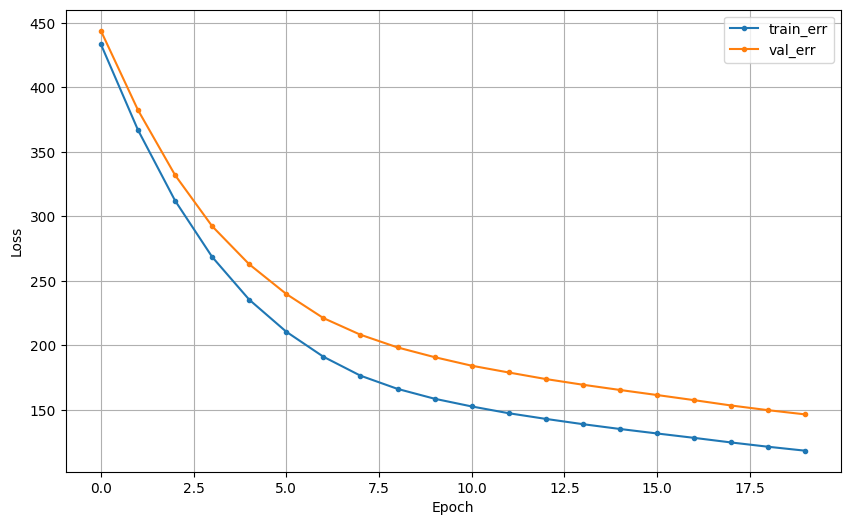

In [ ]:
dl_history_plot(history)

In [ ]:
## 학습횟수 늘려야함 #★

### (3) 예측 및 검증

In [ ]:
pred = model.predict(x_val)

4/4 [==============================] - 0s 3ms/step


In [ ]:
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

RMSE : 9.263167075456117
MAE  : 6.139706845377006
MAPE : 0.31855666014572936


## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

12

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model2 = Sequential(Dense(1, input_shape=(nfeatures,) ))

# 모델요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

* 학습

In [ ]:
history = model2.fit(x_train, y_train, epochs=30, validation_split=.2).history

Epoch 1/30
11/11 [==============================] - 0s 9ms/step - loss: 89.1620 - val_loss: 95.4638
Epoch 2/30
11/11 [==============================] - 0s 6ms/step - loss: 84.2408 - val_loss: 89.2790
Epoch 3/30
11/11 [==============================] - 0s 6ms/step - loss: 79.8235 - val_loss: 83.4193
Epoch 4/30
11/11 [==============================] - 0s 6ms/step - loss: 75.9822 - val_loss: 79.4034
Epoch 5/30
11/11 [==============================] - 0s 6ms/step - loss: 72.9560 - val_loss: 74.4831
Epoch 6/30
11/11 [==============================] - 0s 6ms/step - loss: 70.0756 - val_loss: 70.4208
Epoch 7/30
11/11 [==============================] - 0s 4ms/step - loss: 67.4963 - val_loss: 67.3399
Epoch 8/30
11/11 [==============================] - 0s 6ms/step - loss: 65.4217 - val_loss: 64.5166
Epoch 9/30
11/11 [==============================] - 0s 4ms/step - loss: 63.5744 - val_loss: 62.1479
Epoch 10/30
11/11 [==============================] - 0s 5ms/step - loss: 62.1197 - val_loss: 59.6390

* 학습결과 그래프

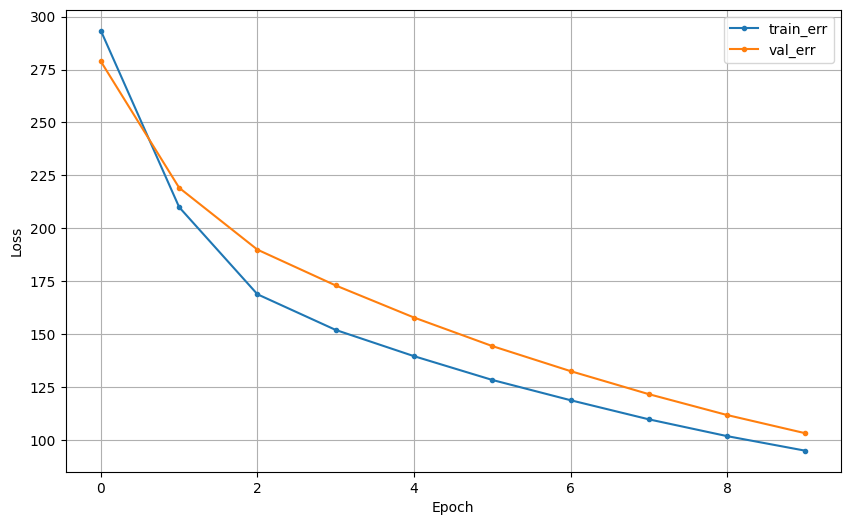

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred2 = model2.predict(x_val)

print(f'RMSE : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}') # 평균오차율

4/4 [==============================] - 0s 3ms/step
RMSE : 5.860841883862189
MAE  : 4.389830141441496
MAPE : 0.21658822127646765


## 5.실습!
* 위 4번에 이어서, 여러분은 다음을 조절할 수 있습니다.
    * epochs(반복횟수), learning_rate(학습율)
* 4번 코드를 그대로 보면서 작성하고 위 두가지를 조절하며 성능을 높여봅시다!

### (1) 데이터 전처리

* 데이터 분할

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
nfeatures = x_train.shape[1]
# nfeatures

# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model3 = Sequential(Dense(1, input_shape=(nfeatures,) ))

# 모델요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [ ]:
model3.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

* 학습

In [ ]:
history = model3.fit(x_train, y_train, epochs=30, validation_split=.2).history

Epoch 1/30
11/11 [==============================] - 1s 18ms/step - loss: 52.9634 - val_loss: 46.9423
Epoch 2/30
11/11 [==============================] - 0s 5ms/step - loss: 50.4788 - val_loss: 45.1347
Epoch 3/30
11/11 [==============================] - 0s 5ms/step - loss: 48.5390 - val_loss: 43.0904
Epoch 4/30
11/11 [==============================] - 0s 4ms/step - loss: 46.9419 - val_loss: 41.0523
Epoch 5/30
11/11 [==============================] - 0s 6ms/step - loss: 45.1171 - val_loss: 40.2280
Epoch 6/30
11/11 [==============================] - 0s 6ms/step - loss: 44.0750 - val_loss: 37.9135
Epoch 7/30
11/11 [==============================] - 0s 7ms/step - loss: 42.6951 - val_loss: 35.9737
Epoch 8/30
11/11 [==============================] - 0s 5ms/step - loss: 41.3652 - val_loss: 35.7048
Epoch 9/30
11/11 [==============================] - 0s 6ms/step - loss: 41.0712 - val_loss: 33.8254
Epoch 10/30
11/11 [==============================] - 0s 6ms/step - loss: 39.4512 - val_loss: 34.137

* 학습결과 그래프

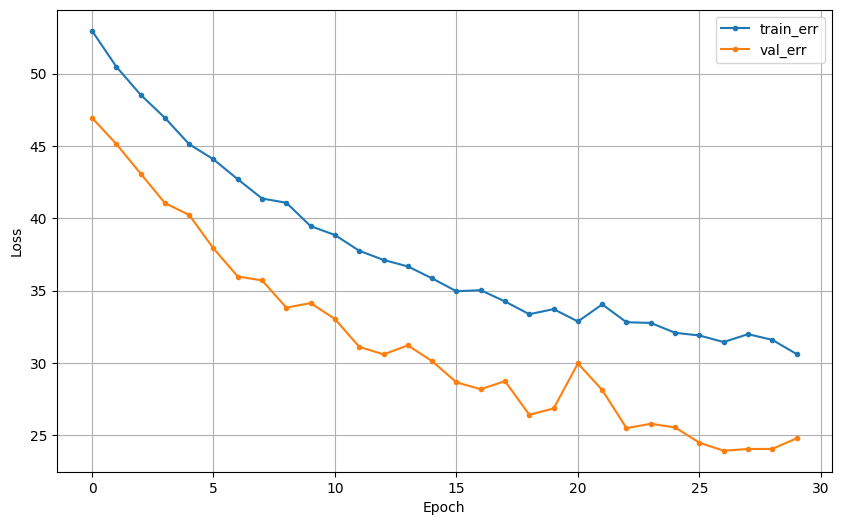

In [ ]:
dl_history_plot(history)


* 예측 및 평가

In [ ]:
pred2 = model3.predict(x_val)

print(f'RMSE : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}') # 평균오차율

4/4 [==============================] - 0s 3ms/step
RMSE : 4.801170169948693
MAE  : 3.7020535693449137
MAPE : 0.18831144589879562


----

## 5.딥러닝3 : hidden layer!
* 이제 레이어를 추가해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언(입력은 리스트로!)
model3 = Sequential([  Dense(2, input_shape = (nfeatures,), activation = 'relu'), # 히든레이어 #★
                       Dense(1)   ])

# 모델요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 26        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 29 (116.00 Byte)
Trainable params: 29 (116.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [ ]:
model3.compile(optimizer= Adam(learning_rate=0.1), loss = 'mse')

* 학습

In [ ]:
hist = model3.fit(x_train, y_train, epochs = 50 , validation_split= .2 ).history

Epoch 1/50
11/11 [==============================] - 1s 17ms/step - loss: 510.5780 - val_loss: 337.9755
Epoch 2/50
11/11 [==============================] - 0s 7ms/step - loss: 193.3317 - val_loss: 196.5884
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 153.0294 - val_loss: 126.9430
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 109.0725 - val_loss: 102.1483
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 83.9555 - val_loss: 69.7529
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 69.0610 - val_loss: 62.1393
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 65.2453 - val_loss: 52.5274
Epoch 8/50
11/11 [==============================] - 0s 5ms/step - loss: 61.5894 - val_loss: 48.9725
Epoch 9/50
11/11 [==============================] - 0s 6ms/step - loss: 56.5802 - val_loss: 48.4814
Epoch 10/50
11/11 [==============================] - 0s 6ms/step - loss: 53.5102 - val_loss

* 학습결과 그래프

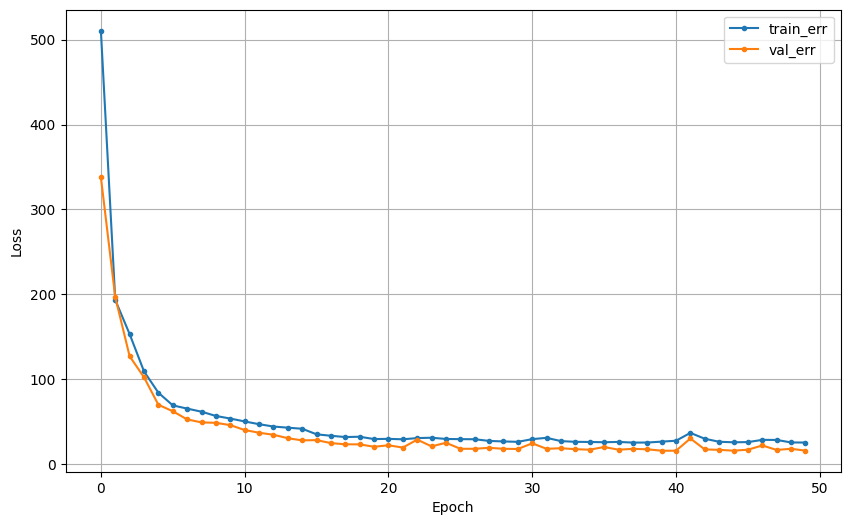

In [ ]:
dl_history_plot(hist)

* 예측 및 평가

In [ ]:
pred3 = model3.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred3, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred3)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred3)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 4.48122430862439
MAE  : 3.4584754495059746
MAPE : 0.17723951924452352


### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # |
| ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 |
| dense_1 (Dense) | (None, 1) | 9 |     

In [ ]:
# input 12개 - 8개 - 1개노드 output

In [ ]:
model4 = Sequential([ Dense(8, input_shape=(nfeatures,), activation='relu'),
                      Dense(1) ])
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [ ]:
model4.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

In [ ]:
hist = model4.fit(x_train, y_train, epochs=50, validation_split=.2).history # 학습데이터를 validation set으로 쪼갬

Epoch 1/50
11/11 [==============================] - 1s 20ms/step - loss: 469.2196 - val_loss: 229.2304
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 172.9155 - val_loss: 151.7049
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 116.6539 - val_loss: 114.8046
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 82.6858 - val_loss: 65.6575
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 66.1544 - val_loss: 54.0500
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 60.3816 - val_loss: 47.1742
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 55.0968 - val_loss: 43.8282
Epoch 8/50
11/11 [==============================] - 0s 6ms/step - loss: 51.0919 - val_loss: 39.1931
Epoch 9/50
11/11 [==============================] - 0s 5ms/step - loss: 48.5069 - val_loss: 37.7847
Epoch 10/50
11/11 [==============================] - 0s 7ms/step - loss: 43.0289 - val_loss: 

* 학습곡선

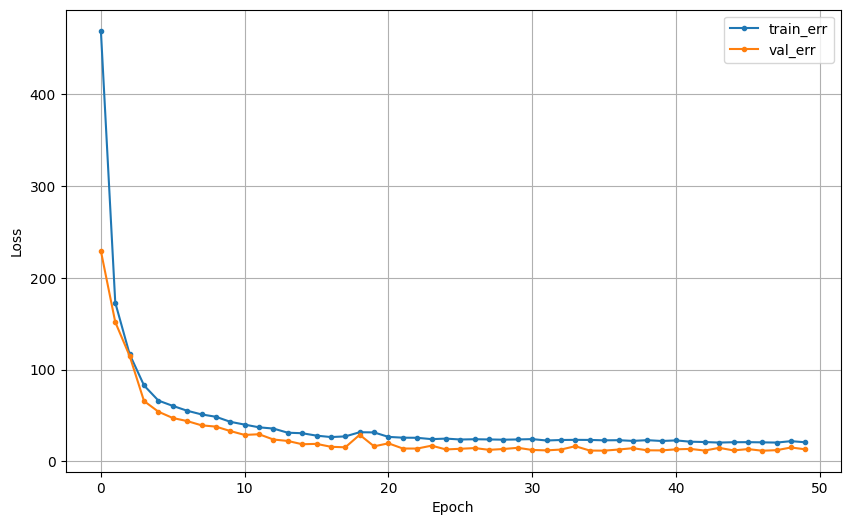

In [ ]:
dl_history_plot(hist)

* 검증

In [ ]:
pred4 = model4.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred4, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred4)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred4)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 3.882248374822236
MAE  : 2.8922510876375087
MAPE : 0.14936799807326115


### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 112 | node, input_shape, activation |
| dense_1 (Dense) | (None, 4) | 36 | node, activation |
| dense_2 (Dense) | (None, 1) | 5 | node |

In [10]:
model = Sequential([ Dense(8, input_shape=(nfeatures,), activation='relu'),
            Dense(4 , activation='relu'),
            Dense(1) ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 32        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [12]:
model.compile( optimizer= Adam(learning_rate=0.1)  , loss = 'mse'   )
hist = model.fit(x_train, y_train, epochs = 50    , validation_split = .2 ).history

Epoch 1/50
11/11 [==============================] - 1s 16ms/step - loss: 384.6819 - val_loss: 234.1537
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 194.4508 - val_loss: 197.8647
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 157.4724 - val_loss: 134.2915
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 110.0564 - val_loss: 107.5654
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 86.1610 - val_loss: 88.4588
Epoch 6/50
11/11 [==============================] - 0s 4ms/step - loss: 62.7271 - val_loss: 62.7018
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 48.2051 - val_loss: 50.1488
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 41.5601 - val_loss: 36.7995
Epoch 9/50
11/11 [==============================] - 0s 4ms/step - loss: 36.7958 - val_loss: 32.0901
Epoch 10/50
11/11 [==============================] - 0s 6ms/step - loss: 34.6795 - val_loss

* 학습곡선

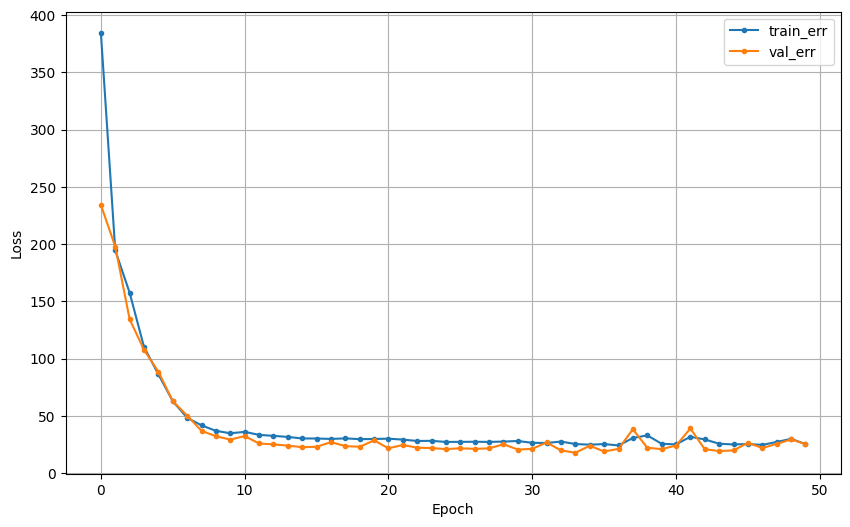

In [16]:
dl_history_plot(hist)

* 검증

In [ ]:
pred4 = model4.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred4, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred4)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred4)}')